outlier detection
    The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.

novelty detection
    The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.


Outlier detection is then also known as unsupervised anomaly detection and novelty detection as semi-supervised anomaly detection.

In [24]:
import numpy as np
import pandas as pd
import random

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn import metrics
from sklearn.decomposition import PCA

#import xcode
import sys
sys.path.append('E:/gitlab/project_on_python/my_own_modul/visualization_and_description')
from ursar import visual, describe, model, clustering

In [2]:
main_data = pd.read_csv("jewellery.csv", sep=",")
main_data.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


# One Class SVM

In [ ]:
Unsupervised Outlier Detection. Estimate the support of a high-dimensional distribution.

In [26]:
ocs = OneClassSVM(kernel='rbf').fit(main_data)
# kernel = {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
# degree = int, default=3
# gamma = {‘scale’, ‘auto’} or float, default=’scale’
# nu = float, default=0.5
y_pred_ocs = ocs.predict(main_data)

label = pd.DataFrame(y_pred_ocs,columns=["ocs"])

# Isolation Forest Algorithm

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [27]:
isfo = IsolationForest(n_estimators=4,random_state=None,n_jobs=-1).fit(main_data)
# n_estimators = int, default=100
# bootstrap = bool, default=False
# contamination = ‘auto’ or float, default=’auto’
# y_pred_isfo = isfo.predict(main_data)
label["isfo"] = isfo.predict(main_data)

# Unsupervised Outlier Detection using Local Outlier Factor (LOF)

In [28]:
lof = LocalOutlierFactor(n_neighbors=4,algorithm="kd_tree",n_jobs=-1)
# n_neighbors int, default=20
# algorithm = {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
# metric = str or callable, optional (default=’minkowski’)
# Valid values for metric are:
#    from scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
#    from scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’]
# p = int, optional (default=2) Parameter for the Minkowski metric
# contamination = ‘auto’ or float, default=’auto’
# novelty = bool, default=False
# y_pred_lof = lof.fit_predict(main_data)
label["lof"] = lof.fit_predict(main_data)

# Robust covariance Elliptic Envelope

An object for detecting outliers in a Gaussian distributed dataset.

In [30]:
rc = EllipticEnvelope(random_state=None).fit(main_data)
# contamination = float, default=0.1
# y_pred_rc = rc.predict(main_data)
label["rc"] = rc.predict(main_data)

# plot

In [16]:
pca = PCA(n_components=2)
X_r = pca.fit(main_data).transform(main_data)

<IPython.core.display.Javascript object>


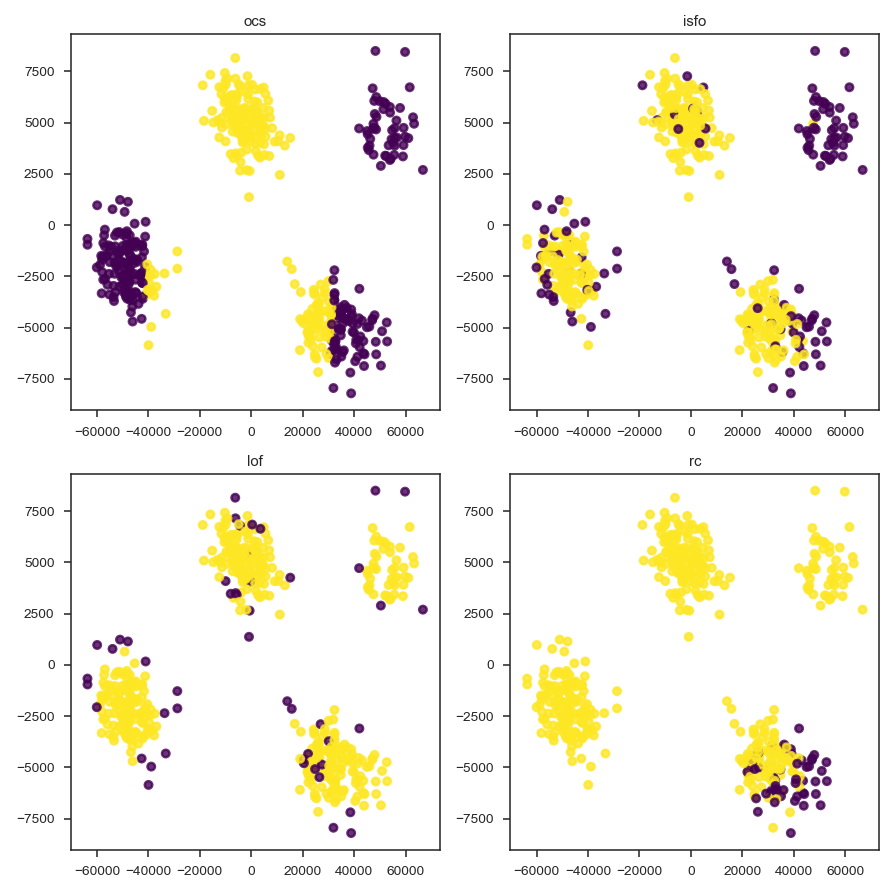

In [32]:
n,m = [2,2]
fig, ax = plt.subplots(n, m, figsize=(10, 10))
colors = ['navy', 'turquoise']
lw = 2
label_names = label.columns

k = 0
for ii in range(0,n):
    for jj in range(0,m):
        if (k==len(label.columns)):
            break
        ax[ii,jj].scatter(X_r[:, 0], X_r[:, 1],
                          c=label.iloc[:,k], alpha=.8, lw=lw, cmap=plt.get_cmap('viridis'))
        ax[ii,jj].set_title(label_names[k])
        k +=1

# fig.suptitle('PCA of IRIS dataset', size=18)
fig.tight_layout()
plt.show()

In [31]:
label

,ocs,isfo,lof,rc
0,1,1,1,1
1,1,1,1,1
2,1,1,-1,1
3,1,1,1,1
4,-1,1,1,1
...,...,...,...,...
500,1,1,1,1
501,-1,-1,1,1
502,1,1,1,1
503,-1,-1,1,1
